# ***Boston house pricing dataset regression project***

# **Importing the dependencies**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Loading the dataset**

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
boston = fetch_openml(name = 'boston', version = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
boston.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [6]:
print(boston.data)

        CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [7]:
print(boston.target)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [8]:
print(boston.feature_names)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


# **Preparing the dataset**

In [9]:
df = pd.DataFrame(boston.data)

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [11]:
df['Price'] = boston.target

In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  Price    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [14]:
df['CHAS'] = df['CHAS'].astype('float64')
df['RAD'] = df['RAD'].astype('float64')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


**Stats of the dataset**

In [16]:
df.describe().drop('count', axis = 0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Checking missing values**

In [17]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

# **Exploratory Data analysis (EDA)**

**Correlation**

In [18]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


There are two types of correlations:

1) Correlation between two independent features

2) Correlation betweeen independent and dependent features

If independent features are highly correlated with each other, we can drop one of those features, like if the correlation is 95% or so..

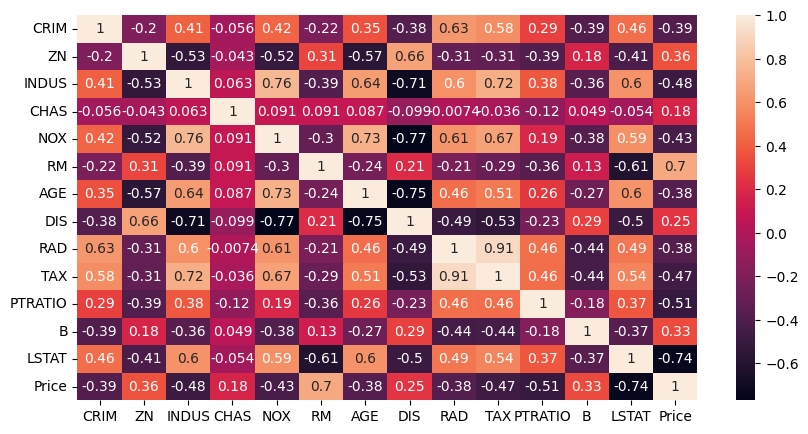

In [19]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True)
plt.show()

## **Price**

In [20]:
df.corr()['Price'].sort_values(ascending = False)

Price      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

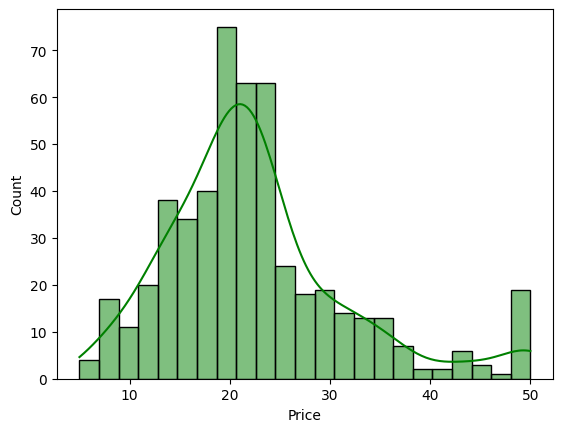

In [21]:
sns.histplot(df['Price'], color = 'g', kde = True)

In [22]:
df['Price'].describe().drop('count', axis = 0)

mean    22.532806
std      9.197104
min      5.000000
25%     17.025000
50%     21.200000
75%     25.000000
max     50.000000
Name: Price, dtype: float64

The relation between crime rate and the price of the house

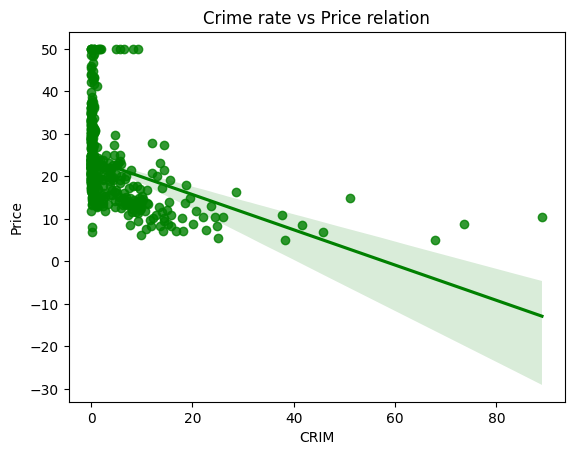

In [23]:
sns.regplot(x = df['CRIM'], y = df['Price'], color = 'g')
plt.title('Crime rate vs Price relation')
plt.show()

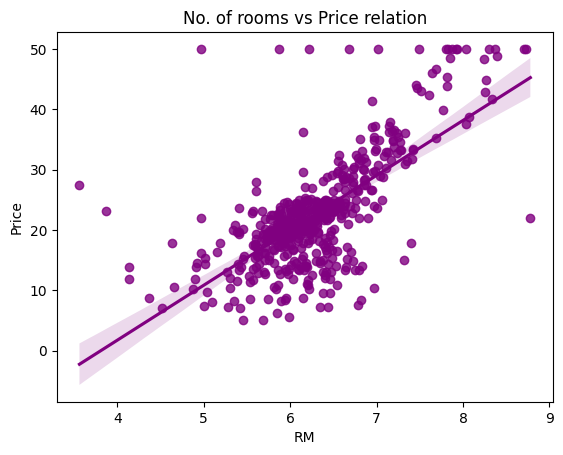

In [24]:
sns.regplot(x = df['RM'], y = df['Price'], color = 'purple')
plt.title('No. of rooms vs Price relation')
plt.show()

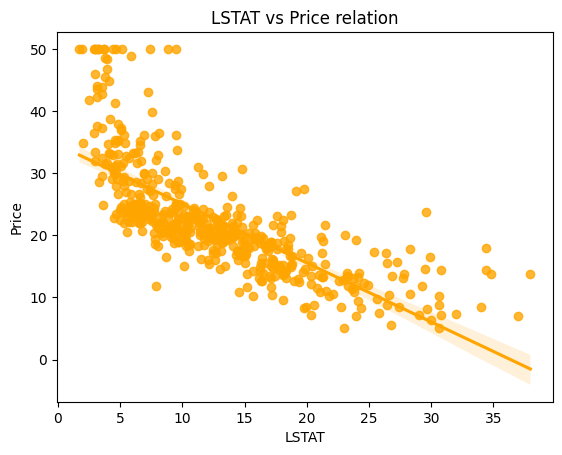

In [25]:
sns.regplot(x = df['LSTAT'], y = df['Price'], color = 'orange')
plt.title('LSTAT vs Price relation')
plt.show()

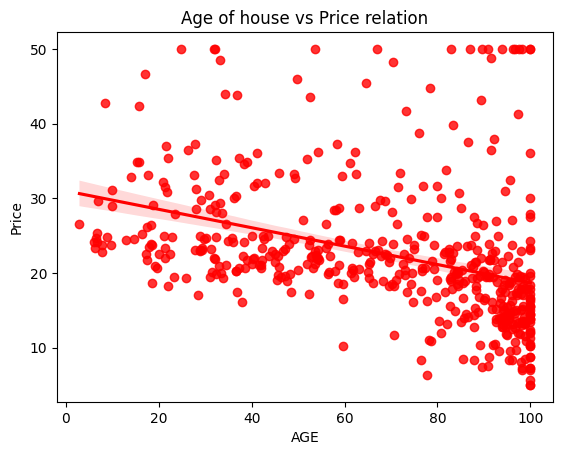

In [26]:
sns.regplot(x = df['AGE'], y = df['Price'], color = 'red')
plt.title('Age of house vs Price relation')
plt.show()

## **Crime rate 'CRIM'**

<Axes: xlabel='CRIM', ylabel='Count'>

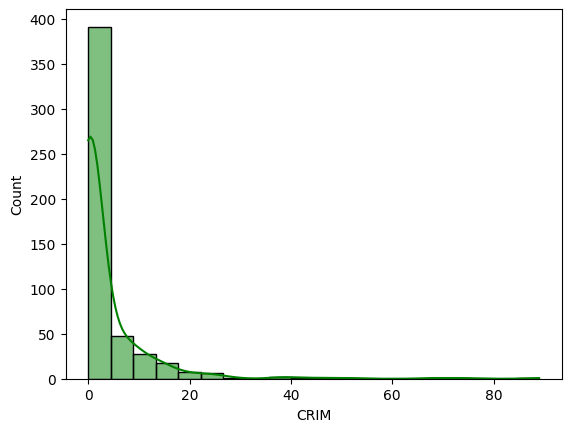

In [27]:
sns.histplot(df['CRIM'], kde = True, color = 'green', bins = 20)

## **Rooms 'RM'**

<Axes: xlabel='RM', ylabel='Count'>

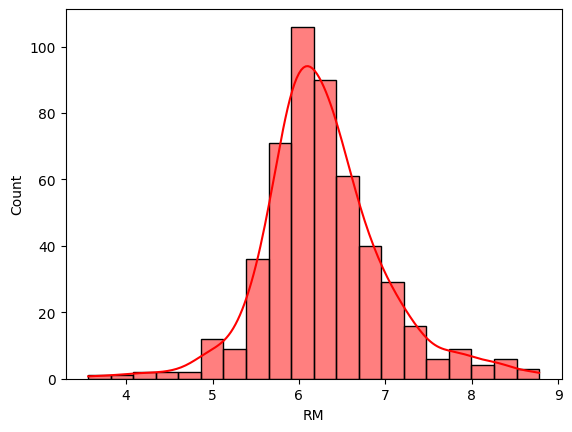

In [28]:
sns.histplot(df['RM'], kde = True, bins = 20, color = 'red')

## **concentration of NO**

<Axes: xlabel='NOX', ylabel='Count'>

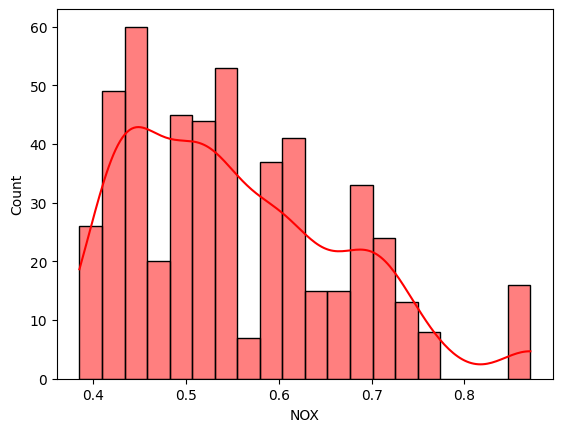

In [29]:
sns.histplot(df['NOX'], kde = True, bins = 20, color = 'red')

## **Age of the house**

<Axes: xlabel='AGE', ylabel='Count'>

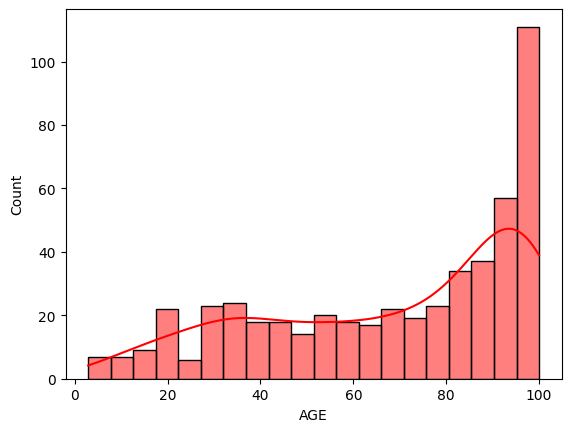

In [30]:
sns.histplot(df['AGE'], kde = True, bins = 20, color = 'red')

## **Pupil to teacher ratio**

<Axes: xlabel='PTRATIO', ylabel='Count'>

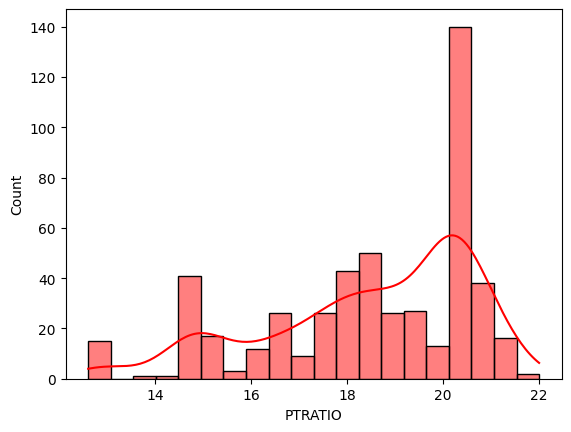

In [31]:
sns.histplot(df['PTRATIO'], kde = True, bins = 20, color = 'red')

## **Outliers**

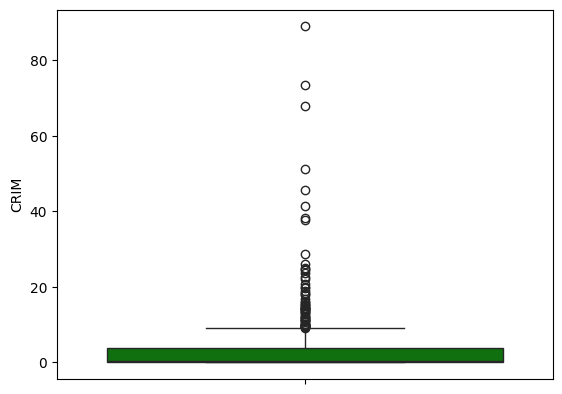

<Figure size 1000x1000 with 0 Axes>

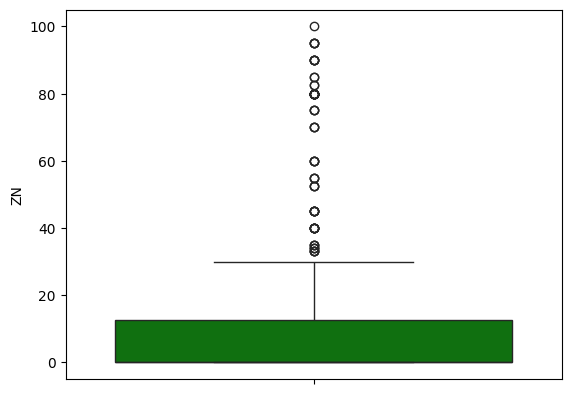

<Figure size 1000x1000 with 0 Axes>

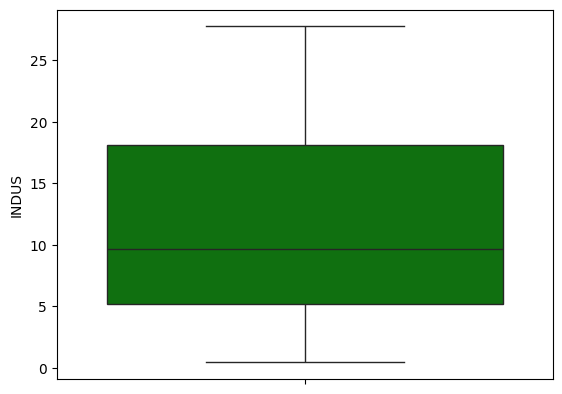

<Figure size 1000x1000 with 0 Axes>

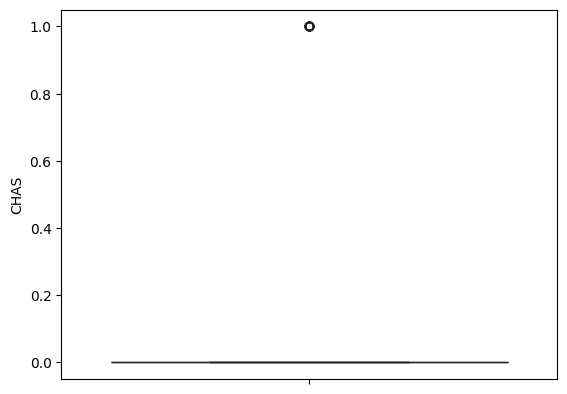

<Figure size 1000x1000 with 0 Axes>

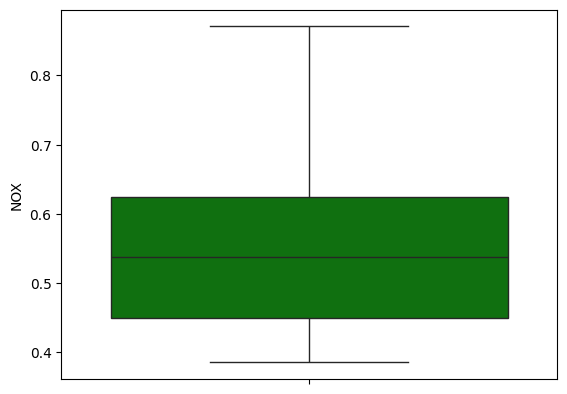

<Figure size 1000x1000 with 0 Axes>

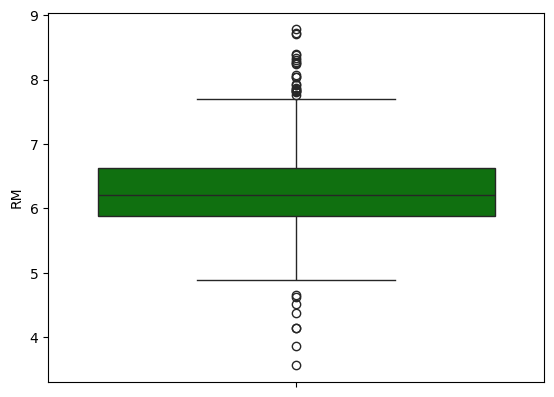

<Figure size 1000x1000 with 0 Axes>

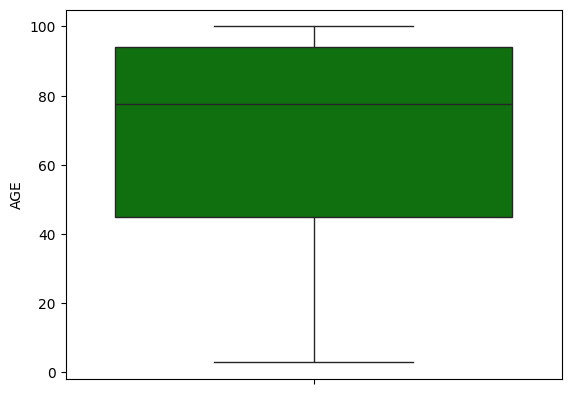

<Figure size 1000x1000 with 0 Axes>

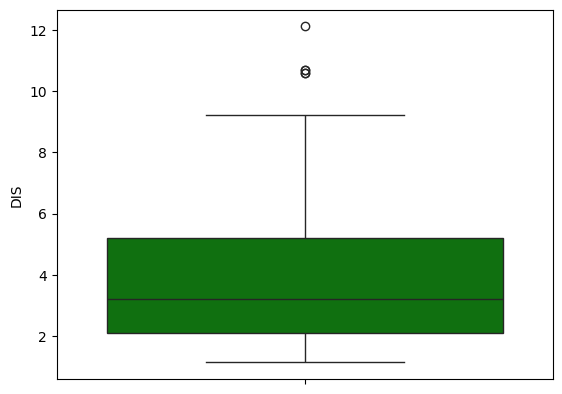

<Figure size 1000x1000 with 0 Axes>

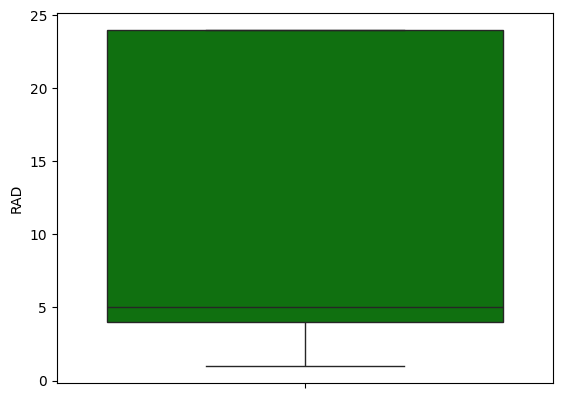

<Figure size 1000x1000 with 0 Axes>

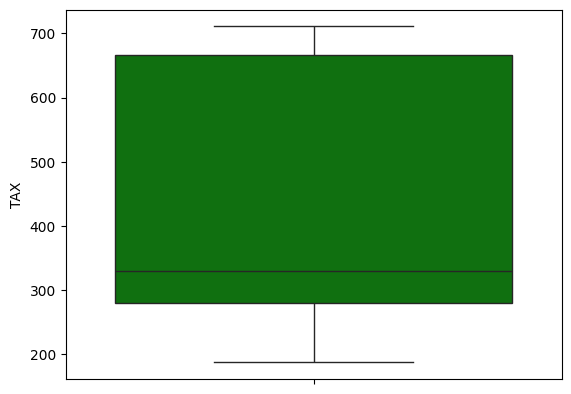

<Figure size 1000x1000 with 0 Axes>

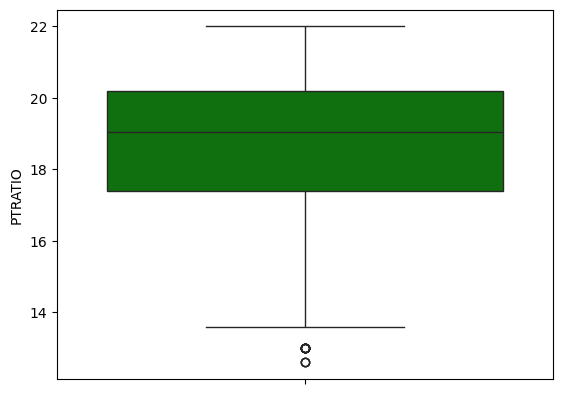

<Figure size 1000x1000 with 0 Axes>

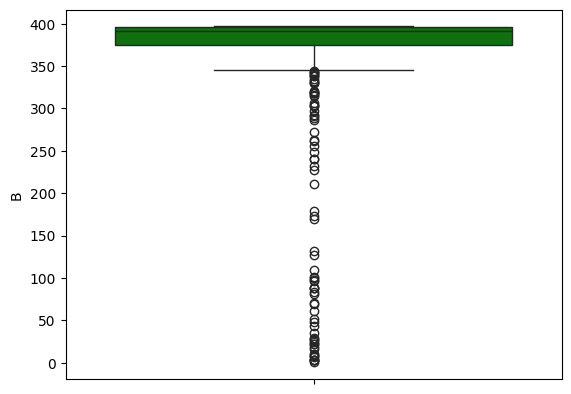

<Figure size 1000x1000 with 0 Axes>

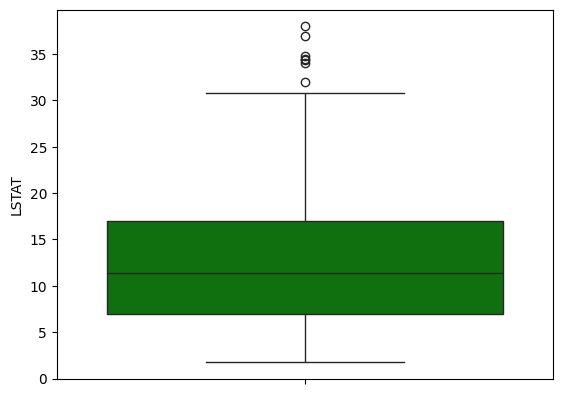

<Figure size 1000x1000 with 0 Axes>

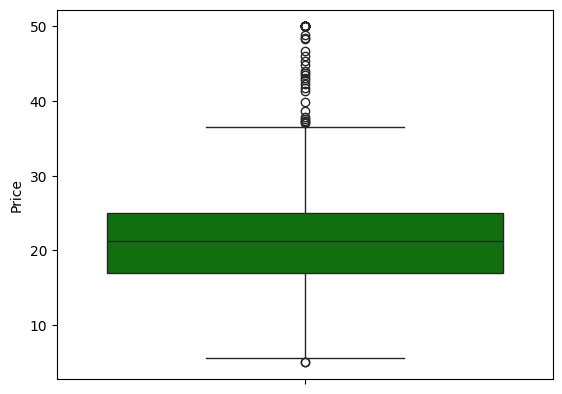

<Figure size 1000x1000 with 0 Axes>

In [32]:
for col in df.columns:
    sns.boxplot(df[col], color = 'g')
    plt.figure(figsize = (10,10))
    plt.show()

# **Input and Target Features**

In [33]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [34]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [35]:
x.shape, y.shape

((506, 13), (506,))

**Train test split**

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [38]:
x_train.shape, x_test.shape

((354, 13), (152, 13))

**Standardization of the data**

We perform regression, for our model to reach the global minima

But all the features here are calculated on different scales, so, for the gradient descent to reach the global minima all the features should be on the same scale

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
x_train = scaler.fit_transform(x_train)

In [42]:
x_test = scaler.transform(x_test)

In [43]:
x_train

array([[-0.40254792,  0.38932946, -0.60459227, ...,  0.0428868 ,
         0.42208077, -0.87535369],
       [-0.37435085, -0.48852168, -0.71623688, ..., -0.50751541,
         0.31764512, -1.38280967],
       [ 1.10822276, -0.48852168,  1.03188273, ...,  0.77675641,
        -0.28889346, -0.06283747],
       ...,
       [-0.42139893,  3.0228829 , -1.33175127, ..., -0.69098281,
         0.35669879, -0.96335184],
       [ 1.00689377, -0.48852168,  1.03188273, ...,  0.77675641,
        -2.7268955 ,  1.57099478],
       [-0.41853219, -0.48852168, -0.8646067 , ...,  0.77675641,
         0.33980478, -0.85188752]])

In [44]:
x_test

array([[-0.3601466 , -0.48852168, -0.17270389, ..., -0.0488469 ,
         0.42208077, -1.17601402],
       [-0.41857448,  0.38932946, -1.1378422 , ..., -1.65418667,
         0.37085026, -1.16868084],
       [-0.35579587, -0.48852168, -0.71623688, ..., -0.50751541,
         0.25862581, -1.1628143 ],
       ...,
       [-0.42157962,  2.80342012, -1.03941866, ...,  1.18955807,
         0.42208077,  0.32875428],
       [-0.11840771, -0.48852168,  1.24929593, ..., -1.74592038,
        -2.035119  ,  2.23538079],
       [-0.41683931, -0.48852168, -0.96743726, ..., -0.00298005,
         0.42208077, -0.43096305]])

In [45]:
import pickle
pickle.dump(scaler, open('scaling.pkl', 'wb'))

# **Model Building**

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
reg = LinearRegression()

# **Model Training and Testing**

In [48]:
reg.fit(x_train, y_train)

LinearRegression()

In [49]:
print(reg.coef_)

[-0.75838542  0.69408694  0.16473562  0.83242138 -1.77223409  2.93433659
 -0.09634423 -2.50319538  2.48581202 -1.50894245 -1.96363408  1.09043705
 -3.73463308]


In [50]:
print(reg.intercept_)

22.399717514124294


In [51]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [52]:
y_pred = reg.predict(x_test)

In [53]:
y_pred

array([28.85623844, 34.42290666, 41.05849679, 17.50720424, 19.59183602,
       30.84731181, 16.46653033, 21.09288981,  6.48567972,  7.54948846,
       21.21367367,  5.71768749, 18.39092064, 25.46990979,  8.71565462,
       18.25959127, 21.31592468, 36.03453698, 22.85005259, -0.41050734,
       33.20232415, 19.07689941, 15.52763858, 28.15121989, 43.80646696,
       20.31330434, 36.29206855, 12.70252057, 22.22855432, 24.52370837,
       22.92220192, 16.68278054, 33.47440637, 18.94476667, 24.21061309,
       33.85982772, 20.44767385, 14.08850629, 18.60359337, 27.9539365 ,
       23.26072734, 26.16058864, 28.62346761, 24.19689537, 31.39783542,
       19.90408948, 26.80886451, 19.71066778, 12.82024069, 18.89797691,
       25.70353272, 21.65418406, 26.9505892 , 16.15050448, 24.98737038,
       21.74289192, 21.88392841, 27.0325943 , 23.18285482, 25.07325552,
       30.38613822, 17.60874594, 41.49920054, 32.78728912, 12.1120624 ,
       23.32962195, 39.41451274, 28.31990404, 16.32930602, 40.67

# **Performance metrics**

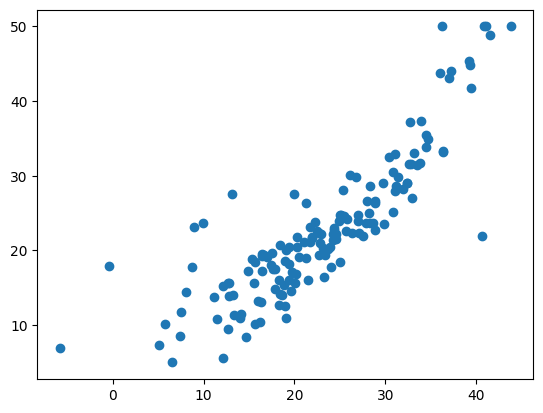

In [54]:
plt.scatter(y_pred, y_test)

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [56]:
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
rmse = np.sqrt(mse)

In [57]:
mae, mse, rmse

(3.6250903581481273, 24.271316028699207, 4.926592740292139)

In [58]:
from sklearn.metrics import r2_score

In [59]:
score = r2_score(y_test, y_pred)

In [60]:
score

0.7283106732391935

**Adjusted R2-score**

In [61]:
adj_score = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)

In [62]:
adj_score

0.7027167511530306

# **Predictive system**

Predicting the price for new data

In [63]:
data = np.array(boston.data.head(1))

In [64]:
data

array([[0.00632, 18.0, 2.31, '0', 0.538, 6.575, 65.2, 4.09, '1', 296.0,
        15.3, 396.9, 4.98]], dtype=object)

In [65]:
data.shape

(1, 13)

In [66]:
## Standardization of this data
data = scaler.transform(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [67]:
reg.predict(data)

array([29.99773697])

In [68]:
boston.target[0]

24.0

# **Pickling the Model**

In [69]:
import pickle

In [70]:
pickle.dump(reg, open('regmodel.pkl', 'wb'))

In [71]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

In [72]:
pickled_model.predict(data)

array([29.99773697])